импортим нужные библиотеки

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

загружаем мнист

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images.shape, test_labels.shape

((60000, 28, 28), (10000,))

выводим 1 картинку

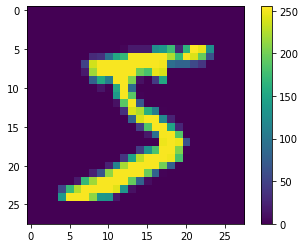

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

разделяем наш дата сет на тренировочные и проверочные данные в отношении 4 к 1

In [4]:
from sklearn.model_selection import train_test_split
train_images = train_images.astype(np.float32).reshape(-1, 28*28)/255.0
test_images = test_images.astype(np.float32).reshape(-1, 28*28)/255.0
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)
train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)
Xdata = np.concatenate([train_images, test_images])
Ydata = np.concatenate([train_labels, test_labels])
train_images, test_images, train_labels, test_labels = train_test_split(Xdata, Ydata, test_size=0.2)
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((56000, 784), (14000, 784), (56000, 10), (14000, 10))

пишем сетку с 2 слоями и активатором softmax

In [5]:
model_first = keras.Sequential([keras.Input(shape=(28*28)),
     tf.keras.layers.Dense(128,name='layer1',activation='relu'),
     tf.keras.layers.Dense(10,name='logits', activation='softmax')],name='Model')
model_first.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 logits (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


инициализируем некоторые переменные для удобства

In [6]:
import tensorflow_addons as tfa
learning_rate = 0.01
crossentropy = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
accuracy = keras.metrics.CategoricalAccuracy()
auc_score = keras.metrics.AUC()
f1_score = tfa.metrics.F1Score(num_classes=len(train_labels[0]))

компилим и обучаем данные 

In [7]:
model_first.compile(loss=crossentropy, optimizer=optimizer,metrics=[accuracy,auc_score,f1_score])
model_first.fit(train_images,train_labels,batch_size=70,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
800/800 [==============================] - 3s 3ms/step - loss: 0.9401 - categorical_accuracy: 0.7733 - auc: 0.9654 - f1_score: 0.7664 - val_loss: 0.5115 - val_categorical_accuracy: 0.8724 - val_auc: 0.9875 - val_f1_score: 0.8696
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4439 - categorical_accuracy: 0.8824 - auc: 0.9892 - f1_score: 0.8805 - val_loss: 0.3896 - val_categorical_accuracy: 0.8961 - val_auc: 0.9908 - val_f1_score: 0.8941
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3699 - categorical_accuracy: 0.8985 - auc: 0.9912 - f1_score: 0.8970 - val_loss: 0.3456 - val_categorical_accuracy: 0.9057 - val_auc: 0.9919 - val_f1_score: 0.9037
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3347 - categorical_accuracy: 0.9067 - auc: 0.9922 - f1_score: 0.9055 - val_loss: 0.3197 - val_categorical_accuracy: 0.9106 - val_auc: 0.9925 - val_f1_score: 0.9088
Epoch 5/10
800/800 [====================

In [8]:
history_model_first = model_first.fit(train_images,train_labels,batch_size=70,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 0.2371 - categorical_accuracy: 0.9340 - auc: 0.9952 - f1_score: 0.9332 - val_loss: 0.2361 - val_categorical_accuracy: 0.9328 - val_auc: 0.9951 - val_f1_score: 0.9317
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.2287 - categorical_accuracy: 0.9360 - auc: 0.9955 - f1_score: 0.9353 - val_loss: 0.2283 - val_categorical_accuracy: 0.9359 - val_auc: 0.9954 - val_f1_score: 0.9349
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.2208 - categorical_accuracy: 0.9379 - auc: 0.9958 - f1_score: 0.9373 - val_loss: 0.2231 - val_categorical_accuracy: 0.9374 - val_auc: 0.9956 - val_f1_score: 0.9364
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.2137 - categorical_accuracy: 0.9402 - auc: 0.9960 - f1_score: 0.9395 - val_loss: 0.2157 - val_categorical_accuracy: 0.9388 - val_auc: 0.9958 - val_f1_score: 0.9379
Epoch 5/10
800/800 [====================

выводим графики через history для примера с tensorboard

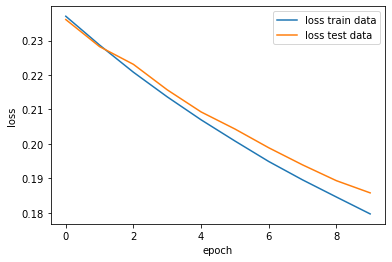

In [9]:
plt.plot(history_model_first.history['loss'], label='loss train data')
plt.plot(history_model_first.history['val_loss'], label='loss test data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

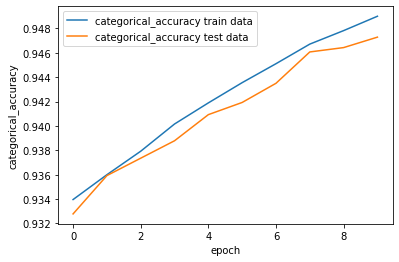

In [10]:
plt.plot(history_model_first.history['categorical_accuracy'], label='categorical_accuracy train data')
plt.plot(history_model_first.history['val_categorical_accuracy'], label='categorical_accuracy test data')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

**Реализуем модель с несколькими скрытыми шарами**

In [11]:
he_initializer = tf.keras.initializers.HeNormal()
model_second = tf.keras.Sequential([
    tf.keras.Input(shape=(28*28)),
    tf.keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.Dense(10, name='logits', activation='softmax')
])
model_second.compile(loss=crossentropy, optimizer=optimizer,metrics=[accuracy,auc_score,f1_score])
model_second.fit(train_images,train_labels,batch_size=70,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
800/800 [==============================] - 4s 4ms/step - loss: 0.7677 - categorical_accuracy: 0.8346 - auc: 0.9803 - f1_score: 0.8327 - val_loss: 0.3951 - val_categorical_accuracy: 0.8907 - val_auc: 0.9907 - val_f1_score: 0.8888
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.3462 - categorical_accuracy: 0.9037 - auc: 0.9919 - f1_score: 0.9025 - val_loss: 0.3076 - val_categorical_accuracy: 0.9139 - val_auc: 0.9927 - val_f1_score: 0.9127
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.2897 - categorical_accuracy: 0.9182 - auc: 0.9935 - f1_score: 0.9172 - val_loss: 0.2717 - val_categorical_accuracy: 0.9233 - val_auc: 0.9938 - val_f1_score: 0.9222
Epoch 4/10
800/800 [==============================] - 3s 4ms/step - loss: 0.2579 - categorical_accuracy: 0.9271 - auc: 0.9945 - f1_score: 0.9264 - val_loss: 0.2464 - val_categorical_accuracy: 0.9292 - val_auc: 0.9947 - val_f1_score: 0.9282
Epoch 5/10
800/800 [====================

**модель обучилась лучше нежели традиионная модель, по этому будем использовать модель HE**

In [12]:
history_model_second = model_second.fit(train_images, train_labels, batch_size=70, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1530 - categorical_accuracy: 0.9560 - auc: 0.9976 - f1_score: 0.9557 - val_loss: 0.1600 - val_categorical_accuracy: 0.9533 - val_auc: 0.9973 - val_f1_score: 0.9528
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1448 - categorical_accuracy: 0.9587 - auc: 0.9978 - f1_score: 0.9584 - val_loss: 0.1541 - val_categorical_accuracy: 0.9544 - val_auc: 0.9974 - val_f1_score: 0.9538
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1373 - categorical_accuracy: 0.9611 - auc: 0.9979 - f1_score: 0.9608 - val_loss: 0.1483 - val_categorical_accuracy: 0.9564 - val_auc: 0.9975 - val_f1_score: 0.9558
Epoch 4/10
800/800 [==============================] - 6s 8ms/step - loss: 0.1307 - categorical_accuracy: 0.9626 - auc: 0.9982 - f1_score: 0.9623 - val_loss: 0.1425 - val_categorical_accuracy: 0.9586 - val_auc: 0.9977 - val_f1_score: 0.9581
Epoch 5/10
800/800 [====================

выводим ключи от функции history, что бы увидеть какие ключи можно использовать 

In [13]:
history_model_second.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'auc', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_auc', 'val_f1_score'])

графики через history:

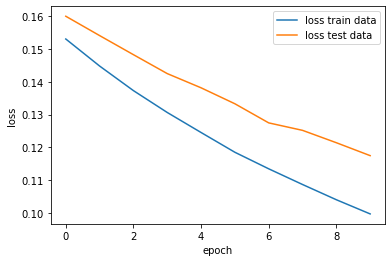

In [14]:
plt.plot(history_model_second.history['loss'], label='loss train data')
plt.plot(history_model_second.history['val_loss'], label='loss test data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

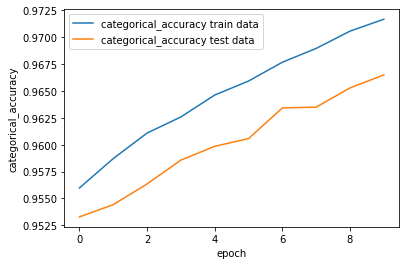

In [15]:
plt.plot(history_model_second.history['categorical_accuracy'], label='categorical_accuracy train data')
plt.plot(history_model_second.history['val_categorical_accuracy'], label='categorical_accuracy test data')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

load_ext tensorboard нам нужен для загрузки расширения для tensorboard

In [16]:
%load_ext tensorboard

**Тестим разную скорость обучния**

In [17]:
logdir = "logs/loss_test/" + 'loss_test_0.1'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_lr_0_1 = keras.Sequential([keras.Input(shape=(28*28)),
     tf.keras.layers.Dense(128,name='layer1',activation='relu'),
     tf.keras.layers.Dense(10,name='logits', activation='softmax')] ,name='Model')

model_lr_0_1.compile(
    loss=crossentropy, # keras.losses.mean_squared_error
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
)

print("Training ... With default parameters, this takes less than 10 seconds.")
training_history = model_lr_0_1.fit(
    train_images, # input
    train_labels, # output
    batch_size=70,
    verbose=0, # Suppress chatty output; use Tensorboard instead
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback],
)

print("Average test loss: ", np.average(training_history.history['loss']))

Training ... With default parameters, this takes less than 10 seconds.
Average test loss:  0.1402480598539114


In [18]:
logdir = "logs/loss_test/" + 'loss_test_0.01'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_lr_0_01 = keras.Sequential([keras.Input(shape=(28*28)),
     tf.keras.layers.Dense(128,name='layer1',activation='relu'),
     tf.keras.layers.Dense(10,name='logits', activation='softmax')] ,name='Model')

model_lr_0_01.compile(
    loss=crossentropy, # keras.losses.mean_squared_error
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
)

print("Training ... With default parameters, this takes less than 10 seconds.")
training_history = model_lr_0_01.fit(
    train_images, # input
    train_labels, # output
    batch_size=70,
    verbose=0, # Suppress chatty output; use Tensorboard instead
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback],
)

print("Average test loss: ", np.average(training_history.history['loss']))

Training ... With default parameters, this takes less than 10 seconds.
Average test loss:  0.3724361002445221


In [19]:
logdir = "logs/loss_test/" + 'loss_test_0.005'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_lr_0_05 = keras.Sequential([keras.Input(shape=(28*28)),
     tf.keras.layers.Dense(128,name='layer1',activation='relu'),
     tf.keras.layers.Dense(10,name='logits', activation='softmax')] ,name='Model')

model_lr_0_05.compile(
    loss=crossentropy, # keras.losses.mean_squared_error
    optimizer=keras.optimizers.SGD(learning_rate=0.005),
)

print("Training ... With default parameters, this takes less than 10 seconds.")
training_history = model_lr_0_05.fit(
    train_images, # input
    train_labels, # output
    batch_size=70,
    verbose=0, # Suppress chatty output; use Tensorboard instead
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback],
)

print("Average test loss: ", np.average(training_history.history['loss']))

Training ... With default parameters, this takes less than 10 seconds.
Average test loss:  0.47034204602241514


In [20]:
logdir = "logs/loss_test/" + 'loss_test_0.001'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_lr_0_001 = keras.Sequential([keras.Input(shape=(28*28)),
     tf.keras.layers.Dense(128,name='layer1',activation='relu'),
     tf.keras.layers.Dense(10,name='logits', activation='softmax')] ,name='Model')

model_lr_0_001.compile(
    loss=crossentropy, # keras.losses.mean_squared_error
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
)

print("Training ... With default parameters, this takes less than 10 seconds.")
training_history = model_lr_0_001.fit(
    train_images, # input
    train_labels, # output
    batch_size=70,
    verbose=0, # Suppress chatty output; use Tensorboard instead
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback],
)

print("Average test loss: ", np.average(training_history.history['loss']))

Training ... With default parameters, this takes less than 10 seconds.
Average test loss:  0.9509633719921112


используем тензорборд для того что бы увидеть все графики и выбрать наилучшую модель по показателям

In [21]:
%tensorboard --logdir logs/loss_test --host localhost

Reusing TensorBoard on port 6006 (pid 16200), started 2 days, 3:05:01 ago. (Use '!kill 16200' to kill it.)

**используем модель с активатором leakyrelu**

In [23]:
logdir = "logs/loss_test/" + 'activation_elu'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_relu = keras.Sequential([keras.Input(shape=(28*28)),
     keras.layers.LeakyReLU(),
     keras.layers.Dense(128,name='layer2',activation='relu',kernel_initializer=he_initializer),
     keras.layers.Dense(10,name='logits', activation='softmax')],name='model_leaky_relu')

model_relu.compile(
    loss=crossentropy, # keras.losses.mean_squared_error
    optimizer=optimizer,
    metrics=[accuracy, auc_score]
)

print("Training ... With default parameters, this takes less than 10 seconds.")
model_relu = model_relu.fit(
    train_images, # input
    train_labels, # output
    batch_size=70,
    verbose=0, # Suppress chatty output; use Tensorboard instead
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback],
)

print("Average test loss: ", np.average(model_relu.history['loss']))

Training ... With default parameters, this takes less than 10 seconds.
Average test loss:  0.37447370290756227


In [24]:
%tensorboard --logdir logs/loss_test

Reusing TensorBoard on port 6006 (pid 12088), started 13:36:58 ago. (Use '!kill 12088' to kill it.)

у меня не получилось удалять все предыдущие раны, по этому оставил так, прошу прощения

In [25]:
!rm -rf /logs/ 

'rm' is not recognized as an internal or external command,
operable program or batch file.


**модель с оптимизатором adam**

In [26]:
logdir = "logs/loss_test/" + 'optimizer_adam'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_adam = tf.keras.Sequential([
    tf.keras.Input(shape=(28*28)),
    keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
    keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
    keras.layers.Dense(10, name='logits', activation='softmax')]
)
model_adam.compile(loss=crossentropy, optimizer=optimizer, metrics=[accuracy, auc_score])
model_adam_history = model_adam.fit(
    train_images,
    train_labels,
    batch_size=70,
    epochs=10,
    verbose=0,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback]
)
print("Average test loss: ", np.average(model_adam_history.history['loss']))

Average test loss:  0.11179589256644248


метрими улучшись после использования адаптивного алгоритка оптимизации

In [27]:
%tensorboard --logdir logs/loss_test

Reusing TensorBoard on port 6006 (pid 12088), started 13:37:33 ago. (Use '!kill 12088' to kill it.)

**модель с оптимизатором адам и мини батчами**

In [28]:
logdir = "logs/loss_test/" + 'optimizer_adam_mini_batches'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_adam_mini_batches = tf.keras.Sequential([
    tf.keras.Input(shape=(28*28)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(10, name='logits', activation='softmax')]
)
model_adam_mini_batches.compile(loss=crossentropy, optimizer=optimizer, metrics=[accuracy, auc_score])
model_adam_mb_history = model_adam_mini_batches.fit(
    train_images,
    train_labels,
    batch_size=70,
    epochs=10,
    verbose=0,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback]
)
print("Average test loss: ", np.average(model_adam_mb_history.history['loss']))

Average test loss:  0.07582108415663243


In [29]:
%tensorboard --logdir logs/loss_test

Reusing TensorBoard on port 6006 (pid 12088), started 13:38:25 ago. (Use '!kill 12088' to kill it.)

**модели с дропаутом**

In [30]:
logdir = "logs/loss_test/" + 'optimizer_adam_mini_batches_with_dropout'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_adam_mini_batches_with_dropout = tf.keras.Sequential([
    tf.keras.Input(shape=(28*28)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(10, name='logits', activation='softmax')]
)
model_adam_mini_batches_with_dropout.compile(loss=crossentropy, optimizer=optimizer, metrics=[accuracy, auc_score])
model_adam_mb_with_drop_history = model_adam_mini_batches_with_dropout.fit(
    train_images,
    train_labels,
    batch_size=70,
    epochs=10,
    verbose=0,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback]
)
print("Average test loss: ", np.average(model_adam_mb_with_drop_history.history['loss']))

Average test loss:  0.09680658392608166


In [31]:
logdir = "logs/loss_test/" + 'optimizer_adam_mini_batches_with_dropout_2'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_adam_mini_batches_with_dropout_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(28*28)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(10, name='logits', activation='softmax')]
)
model_adam_mini_batches_with_dropout_2.compile(loss=crossentropy, optimizer=optimizer, metrics=[accuracy, auc_score])
model_adam_mb_with_drop_history_2 = model_adam_mini_batches_with_dropout_2.fit(
    train_images,
    train_labels,
    batch_size=70,
    epochs=10,
    verbose=0,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback]
)
print("Average test loss: ", np.average(model_adam_mb_with_drop_history_2.history['loss']))

Average test loss:  0.08523615933954716


In [32]:
%tensorboard --logdir logs/loss_test

Reusing TensorBoard on port 6006 (pid 12088), started 13:40:20 ago. (Use '!kill 12088' to kill it.)

**Модель с ранней остановкой**

In [33]:
logdir = "logs/loss_test/" + 'optimizer_adam_early_stop'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_adam_early_stop = tf.keras.Sequential([
    tf.keras.Input(shape=(28*28)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(10, name='logits', activation='softmax')]
)
model_adam_early_stop.compile(loss=crossentropy, optimizer=optimizer, metrics=[accuracy, auc_score])
model_adam_early_stop_history = model_adam_early_stop.fit(
    train_images,
    train_labels,
    batch_size=70,
    epochs=10,
    verbose=1,
    validation_data=(test_images, test_labels),
    callbacks=[tf.keras.callbacks.EarlyStopping()]
)
print("Average test loss: ", np.average(model_adam_early_stop_history.history['loss']))

Epoch 1/10
800/800 [==============================] - 8s 8ms/step - loss: 0.2264 - categorical_accuracy: 0.9418 - auc: 0.9953 - val_loss: 0.1360 - val_categorical_accuracy: 0.9576 - val_auc: 0.9972
Epoch 2/10
800/800 [==============================] - 7s 9ms/step - loss: 0.1092 - categorical_accuracy: 0.9655 - auc: 0.9982 - val_loss: 0.0927 - val_categorical_accuracy: 0.9712 - val_auc: 0.9980
Average test loss:  0.16777997836470604


данная модель имеет плохие метрики

дальше идут модели и регуляризацией l1 и l2

In [34]:
logdir = "logs/loss_test/" + 'optimizer_adam_l1'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_adam_l1 = tf.keras.Sequential([
    tf.keras.Input(shape=(28*28)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer, kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer, kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(10, name='logits', activation='softmax')]
)
model_adam_l1.compile(loss=crossentropy, optimizer=optimizer, metrics=[accuracy, auc_score])
model_adam_l1_history = model_adam_l1.fit(
    train_images,
    train_labels,
    batch_size=70,
    epochs=10,
    verbose=0,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback]
)
print("Average test loss: ", np.average(model_adam_l1_history.history['loss']))

Average test loss:  4.2824198484420775


In [35]:
logdir = "logs/loss_test/" + 'optimizer_adam_l2'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_adam_l2 = tf.keras.Sequential([
    tf.keras.Input(shape=(28*28)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(10, name='logits', activation='softmax')]
)
model_adam_l2.compile(loss=crossentropy, optimizer=optimizer, metrics=[accuracy, auc_score])
model_adam_l2_history = model_adam_l2.fit(
    train_images,
    train_labels,
    batch_size=70,
    epochs=10,
    verbose=0,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback]
)
print("Average test loss: ", np.average(model_adam_l2_history.history['loss']))

Average test loss:  0.6890358239412308


In [36]:
%tensorboard --logdir logs/loss_test

Reusing TensorBoard on port 6006 (pid 12088), started 13:42:35 ago. (Use '!kill 12088' to kill it.)

лучше всего показала на тренеровочных данных модель адама с мини батчами, но на тестовых данных вышла лучше та же машина но с дропаутом, по этому возьмем с дропаутом 

In [37]:
predict_value = model_adam_mini_batches_with_dropout.predict(test_images)
predict_value = np.argmax(predict_value, axis=1)
print("Прогноз:",predict_value[0]," Фактическое число: ", list(test_labels[0]).index(1))

Прогноз: 6  Фактическое число:  6


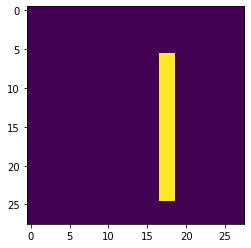

In [38]:
image_8 = np.zeros((28,28))

for i in range(image_8.shape[0]):
  for j in range(image_8.shape[1]):
    if (j==17 or j==18)and 5<i<25:
      image_8[i,j]=255.0 
plt.imshow(image_8)

In [39]:
print('прогноз:', np.argmax(model_adam_mini_batches_with_dropout.predict(image_8.reshape(1, 784))), 'фактическое число: 1')

прогноз: 1 фактическое число: 1


**Загружаем 2 датасэт**

In [40]:
import requests

try:
    from tqdm import tqdm
except ImportError:
    tqdm = lambda x, total, unit: x  # If tqdm doesn't exist, replace it with a function that does nothing
    print('**** Could not import tqdm. Please install tqdm for download progressbars! (pip install tqdm) ****')

# Python2 compatibility
try:
    input = raw_input
except NameError:
    pass

download_dict = {
    '1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)': {
        '1) MNIST data format (ubyte.gz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz'],
        '2) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'],
    },
    '2) Kuzushiji-49 (49 classes, 28x28, 270k examples)': {
        '1) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz'],
    },
    '3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)': {
        '1) Folders of images (.tar)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar'],
    }

}

# Download a list of files
def download_list(url_list):
    for url in url_list:
        path = url.split('/')[-1]
        r = requests.get(url, stream=True)
        with open(path, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))

            for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
                if chunk:
                    f.write(chunk)
    print('All dataset files downloaded!')

# Ask the user about which path to take down the dict
def traverse_dict(d):
    print('Please select a download option:')
    keys = sorted(d.keys())  # Print download options
    for key in keys:
        print(key)

    userinput = input('> ').strip()

    try:
        selection = int(userinput) - 1
    except ValueError:
        print('Your selection was not valid')
        traverse_dict(d)  # Try again if input was not valid
        return

    selected = keys[selection]

    next_level = d[selected]
    if isinstance(next_level, list):  # If we've hit a list of downloads, download that list
        download_list(next_level)
    else:
        traverse_dict(next_level)     # Otherwise, repeat with the next level

# traverse_dict(download_dict)

**подготавливаем данные для использования**

In [41]:
kuz_train_images = np.load('k49-train-imgs.npz')['arr_0']
kuz_train_images.shape

(232365, 28, 28)

In [42]:
kuz_train_labels = np.load('k49-train-labels.npz')['arr_0']
kuz_train_labels.shape

(232365,)

In [43]:
kuz_test_images = np.load('k49-test-imgs.npz')['arr_0']
kuz_test_images.shape

(38547, 28, 28)

In [44]:
kuz_test_labels = np.load('k49-test-labels.npz')['arr_0']
kuz_test_labels.shape

(38547,)

разбиваем данные на тренеровочные и тестовые

In [45]:
kuz_train_images = kuz_train_images.astype(np.float32).reshape(-1,28*28)/255.0
kuz_test_images = kuz_test_images.astype(np.float32).reshape(-1,28*28)/255.0

num_classes = 49
kuz_train_labels = keras.utils.to_categorical(kuz_train_labels, num_classes)
kuz_test_labels = keras.utils.to_categorical(kuz_test_labels, num_classes)

kuz_train_labels = kuz_train_labels.astype(np.int32)
kuz_test_labels = kuz_test_labels.astype(np.int32)

full_data_images = np.concatenate([kuz_train_images,kuz_test_images])
full_data_labels = np.concatenate([kuz_train_labels,kuz_test_labels])

kuzushi_train_images, kuzushi_test_images, kuzushi_train_labels, kuzushi_test_labels = train_test_split(full_data_images,full_data_labels,test_size=0.2)
kuzushi_train_images.shape, kuzushi_train_labels.shape, kuzushi_test_images.shape, kuzushi_test_labels.shape

((216729, 784), (216729, 49), (54183, 784), (54183, 49))

In [46]:
model_kuz = keras.Sequential([tf.keras.Input(shape=(28*28)),
    keras.layers.Dense(128, name='layer1', activation='relu'),
    keras.layers.Dense(49, name='logits', activation='softmax')
])
model_kuz.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 logits (Dense)              (None, 49)                6321      
                                                                 
Total params: 106,801
Trainable params: 106,801
Non-trainable params: 0
_________________________________________________________________


In [47]:
%reload_ext tensorboard  

выполняем инициализацию для удобства

In [48]:
import tensorflow_addons as tfa
learning_rate = 0.01
crossentropy = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
accuracy = keras.metrics.CategoricalAccuracy()
auc_score = keras.metrics.AUC()
f1_score = tfa.metrics.F1Score(num_classes=49)

компилим и обучаем нашу модель

In [49]:
model_kuz.compile(loss=crossentropy, 
                  optimizer=optimizer, 
                  metrics=[accuracy, auc_score, f1_score])
model_kuz_history = model_kuz.fit(kuzushi_train_images, kuzushi_train_labels, 
                                  epochs=10, 
                                  validation_data=(kuzushi_test_images, kuzushi_test_labels))

Epoch 1/10
6773/6773 [==============================] - 20s 3ms/step - loss: 1.8526 - categorical_accuracy: 0.5598 - auc_1: 0.9385 - f1_score: 0.5067 - val_loss: 1.3957 - val_categorical_accuracy: 0.6562 - val_auc_1: 0.9616 - val_f1_score: 0.6140
Epoch 2/10
6773/6773 [==============================] - 23s 3ms/step - loss: 1.2590 - categorical_accuracy: 0.6853 - auc_1: 0.9672 - f1_score: 0.6488 - val_loss: 1.1808 - val_categorical_accuracy: 0.7069 - val_auc_1: 0.9702 - val_f1_score: 0.6788
Epoch 3/10
6773/6773 [==============================] - 20s 3ms/step - loss: 1.0833 - categorical_accuracy: 0.7295 - auc_1: 0.9738 - f1_score: 0.7029 - val_loss: 1.0471 - val_categorical_accuracy: 0.7393 - val_auc_1: 0.9750 - val_f1_score: 0.7186
Epoch 4/10
6773/6773 [==============================] - 20s 3ms/step - loss: 0.9636 - categorical_accuracy: 0.7581 - auc_1: 0.9782 - f1_score: 0.7362 - val_loss: 0.9485 - val_categorical_accuracy: 0.7635 - val_auc_1: 0.9784 - val_f1_score: 0.7436
Epoch 5/10
6

узнаем какие есть ключи

In [50]:
model_kuz_history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'auc_1', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_auc_1', 'val_f1_score'])

выводим значения accuracy для тренировочной и тестовой выборки

In [51]:
print('accuracy:', model_kuz_history.history['categorical_accuracy'][9], 'test accuracy:', model_kuz_history.history['val_categorical_accuracy'][9])

accuracy: 0.8336401581764221 test accuracy: 0.8225089311599731


модель с инициализатором Хе и активатором relu

In [52]:
he_initializer = tf.keras.initializers.HeNormal()
model_kuz_he = tf.keras.Sequential([
    tf.keras.Input(shape=(28*28)),
    tf.keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.Dense(49, name='logits', activation='softmax')
])
model_kuz_he.compile(loss=crossentropy, optimizer=optimizer,metrics=[accuracy,auc_score,f1_score])
model_kuz_he_history = model_kuz_he.fit(kuzushi_train_images,kuzushi_train_labels,
                                        epochs=10,
                                        validation_data=(kuzushi_test_images,kuzushi_test_labels))
print('accuracy:', model_kuz_he_history.history['categorical_accuracy'][9], 'test accuracy:', 
      model_kuz_he_history.history['val_categorical_accuracy'][9])

Epoch 1/10
6773/6773 [==============================] - 27s 4ms/step - loss: 1.6316 - categorical_accuracy: 0.6451 - auc_1: 0.9600 - f1_score: 0.6101 - val_loss: 1.1509 - val_categorical_accuracy: 0.7096 - val_auc_1: 0.9721 - val_f1_score: 0.6828
Epoch 2/10
6773/6773 [==============================] - 26s 4ms/step - loss: 0.9753 - categorical_accuracy: 0.7505 - auc_1: 0.9783 - f1_score: 0.7242 - val_loss: 0.8872 - val_categorical_accuracy: 0.7736 - val_auc_1: 0.9804 - val_f1_score: 0.7517
Epoch 3/10
6773/6773 [==============================] - 24s 4ms/step - loss: 0.7779 - categorical_accuracy: 0.7983 - auc_1: 0.9846 - f1_score: 0.7773 - val_loss: 0.7459 - val_categorical_accuracy: 0.8072 - val_auc_1: 0.9848 - val_f1_score: 0.7884
Epoch 4/10
6773/6773 [==============================] - 27s 4ms/step - loss: 0.6607 - categorical_accuracy: 0.8268 - auc_1: 0.9878 - f1_score: 0.8092 - val_loss: 0.6598 - val_categorical_accuracy: 0.8276 - val_auc_1: 0.9871 - val_f1_score: 0.8116
Epoch 5/10
6

подбираем значение скорости обучения

In [53]:
logdir = "logs/loss_test/" + 'kuz_loss_test_0_01'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_kuz_loss_0_01 = tf.keras.Sequential([
    tf.keras.Input(shape=(28*28)),
    tf.keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
    tf.keras.layers.Dense(49, name='logits', activation='softmax')
])
model_kuz_loss_0_01.compile(loss=crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics=[accuracy,auc_score,f1_score])
model_kuz_loss_0_01_history = model_kuz_loss_0_01.fit(kuzushi_train_images,kuzushi_train_labels,
                                        epochs=10,
                                        validation_data=(kuzushi_test_images,kuzushi_test_labels))
print('accuracy:', model_kuz_loss_0_01_history.history['categorical_accuracy'][9], 'test accuracy:', 
      model_kuz_loss_0_01_history.history['val_categorical_accuracy'][9])

Epoch 1/10
6773/6773 [==============================] - 28s 4ms/step - loss: 1.6566 - categorical_accuracy: 0.6498 - auc_1: 0.9609 - f1_score: 0.6168 - val_loss: 1.1601 - val_categorical_accuracy: 0.7114 - val_auc_1: 0.9714 - val_f1_score: 0.6844
Epoch 2/10
6773/6773 [==============================] - 27s 4ms/step - loss: 0.9851 - categorical_accuracy: 0.7490 - auc_1: 0.9780 - f1_score: 0.7214 - val_loss: 0.8980 - val_categorical_accuracy: 0.7723 - val_auc_1: 0.9806 - val_f1_score: 0.7522
Epoch 3/10
6773/6773 [==============================] - 26s 4ms/step - loss: 0.7826 - categorical_accuracy: 0.7987 - auc_1: 0.9844 - f1_score: 0.7766 - val_loss: 0.7568 - val_categorical_accuracy: 0.8034 - val_auc_1: 0.9847 - val_f1_score: 0.7848
Epoch 4/10
6773/6773 [==============================] - 27s 4ms/step - loss: 0.6653 - categorical_accuracy: 0.8270 - auc_1: 0.9876 - f1_score: 0.8089 - val_loss: 0.6750 - val_categorical_accuracy: 0.8217 - val_auc_1: 0.9870 - val_f1_score: 0.8060
Epoch 5/10
6

выводим данные в виде графиков в tensorboard

In [54]:
%tensorboard --logdir logs/loss_test

Reusing TensorBoard on port 6006 (pid 12088), started 13:55:06 ago. (Use '!kill 12088' to kill it.)

**модель с активатором leakyrelu**

In [55]:
logdir = "logs/loss_test/" + 'kuz_activation_relu'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_kuz_leakyrelu = keras.Sequential([keras.Input(shape=(28*28)),
     keras.layers.LeakyReLU(),
     keras.layers.Dense(128,name='layer2',activation='relu', kernel_initializer=he_initializer),
     keras.layers.Dense(49,name='logits', activation='softmax')])

model_kuz_leakyrelu.compile(
    loss=crossentropy, # keras.losses.mean_squared_error
    optimizer=optimizer,
    metrics=[accuracy, auc_score]
)

print("Training ... With default parameters, this takes less than 10 seconds.")
model_kuz_history = model_kuz_leakyrelu.fit(
    kuzushi_train_images,
    kuzushi_train_labels,
    epochs=10,
    validation_data=(kuzushi_test_images, kuzushi_test_labels),
    callbacks=[tensorboard_callback],
)

print('accuracy:', model_kuz_history.history['categorical_accuracy'][9], 'test accuracy:', 
      model_kuz_history.history['val_categorical_accuracy'][9])

Training ... With default parameters, this takes less than 10 seconds.
Epoch 1/10
6773/6773 [==============================] - 22s 3ms/step - loss: 1.8446 - categorical_accuracy: 0.6222 - auc_1: 0.9546 - val_loss: 1.3861 - val_categorical_accuracy: 0.6575 - val_auc_1: 0.9616
Epoch 2/10
6773/6773 [==============================] - 21s 3ms/step - loss: 1.2499 - categorical_accuracy: 0.6890 - auc_1: 0.9673 - val_loss: 1.1729 - val_categorical_accuracy: 0.7097 - val_auc_1: 0.9702
Epoch 3/10
6773/6773 [==============================] - 21s 3ms/step - loss: 1.0754 - categorical_accuracy: 0.7305 - auc_1: 0.9743 - val_loss: 1.0383 - val_categorical_accuracy: 0.7415 - val_auc_1: 0.9755
Epoch 4/10
6773/6773 [==============================] - 21s 3ms/step - loss: 0.9558 - categorical_accuracy: 0.7597 - auc_1: 0.9786 - val_loss: 0.9435 - val_categorical_accuracy: 0.7632 - val_auc_1: 0.9788
Epoch 5/10
6773/6773 [==============================] - 21s 3ms/step - loss: 0.8683 - categorical_accuracy: 0

In [56]:
%tensorboard --logdir logs/loss_test

Reusing TensorBoard on port 6006 (pid 12088), started 13:58:33 ago. (Use '!kill 12088' to kill it.)

**модель с оптимизатором адам**

In [57]:
logdir = "logs/loss_test/" + 'kuz_adam'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model_kuz_adam = keras.Sequential([keras.Input(shape=(28*28)),
     keras.layers.LeakyReLU(),
     keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
     keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
     keras.layers.Dense(49, name='logits', activation='softmax')])

model_kuz_adam.compile(
    loss=crossentropy,
    optimizer=optimizer,
    metrics=[accuracy, auc_score]
)

print("Training ... With default parameters, this takes less than 10 seconds.")
model_kuz_adam_history = model_kuz_adam.fit(
    kuzushi_train_images,
    kuzushi_train_labels,
    epochs=10,
    validation_data=(kuzushi_test_images, kuzushi_test_labels),
    callbacks=[tensorboard_callback],
)

print('accuracy:', model_kuz_adam_history.history['categorical_accuracy'][9], 'test accuracy:', 
      model_kuz_adam_history.history['val_categorical_accuracy'][9])

Training ... With default parameters, this takes less than 10 seconds.
Epoch 1/10
6773/6773 [==============================] - 31s 4ms/step - loss: 1.4254 - categorical_accuracy: 0.6767 - auc_1: 0.9634 - val_loss: 1.3594 - val_categorical_accuracy: 0.6795 - val_auc_1: 0.9571
Epoch 2/10
6773/6773 [==============================] - 28s 4ms/step - loss: 1.2738 - categorical_accuracy: 0.6915 - auc_1: 0.9628 - val_loss: 1.3339 - val_categorical_accuracy: 0.6856 - val_auc_1: 0.9595
Epoch 3/10
6773/6773 [==============================] - 28s 4ms/step - loss: 1.2443 - categorical_accuracy: 0.7043 - auc_1: 0.9640 - val_loss: 1.2992 - val_categorical_accuracy: 0.6989 - val_auc_1: 0.9619
Epoch 4/10
6773/6773 [==============================] - 26s 4ms/step - loss: 1.2262 - categorical_accuracy: 0.7100 - auc_1: 0.9650 - val_loss: 1.2965 - val_categorical_accuracy: 0.6998 - val_auc_1: 0.9614
Epoch 5/10
6773/6773 [==============================] - 29s 4ms/step - loss: 1.2238 - categorical_accuracy: 0

**модель с оптимизатором адам и мини батчами**

In [59]:
logdir = "logs/loss_test/" + 'kuz_adam_mini_batches'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_kuz_adam_mini_batches = keras.Sequential([keras.Input(shape=(28*28)),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(49, name='logits', activation='softmax')])

model_kuz_adam_mini_batches.compile(
    loss=crossentropy,
    optimizer=optimizer,
    metrics=[accuracy, auc_score]
)

print("Training ... With default parameters, this takes less than 10 seconds.")
model_kuz_adam_mini_batches_history = model_kuz_adam_mini_batches.fit(
    kuzushi_train_images,
    kuzushi_train_labels,
    epochs=10,
    validation_data=(kuzushi_test_images, kuzushi_test_labels),
    callbacks=[tensorboard_callback],
)

print('accuracy:', model_kuz_adam_mini_batches_history.history['categorical_accuracy'][9], 'test accuracy:', 
      model_kuz_adam_mini_batches_history.history['val_categorical_accuracy'][9])

Training ... With default parameters, this takes less than 10 seconds.
Epoch 1/10
6773/6773 [==============================] - 43s 6ms/step - loss: 0.9128 - categorical_accuracy: 0.7345 - auc_1: 0.9735 - val_loss: 0.5690 - val_categorical_accuracy: 0.8450 - val_auc_1: 0.9882
Epoch 2/10
6773/6773 [==============================] - 37s 6ms/step - loss: 0.6214 - categorical_accuracy: 0.8271 - auc_1: 0.9866 - val_loss: 0.5221 - val_categorical_accuracy: 0.8586 - val_auc_1: 0.9880
Epoch 3/10
6773/6773 [==============================] - 37s 5ms/step - loss: 0.5394 - categorical_accuracy: 0.8485 - auc_1: 0.9888 - val_loss: 0.4666 - val_categorical_accuracy: 0.8723 - val_auc_1: 0.9899
Epoch 4/10
6773/6773 [==============================] - 36s 5ms/step - loss: 0.4899 - categorical_accuracy: 0.8622 - auc_1: 0.9900 - val_loss: 0.4379 - val_categorical_accuracy: 0.8824 - val_auc_1: 0.9900
Epoch 5/10
6773/6773 [==============================] - 39s 6ms/step - loss: 0.4596 - categorical_accuracy: 0

In [60]:
%tensorboard --logdir logs/loss_test

Reusing TensorBoard on port 6006 (pid 12088), started 14:27:44 ago. (Use '!kill 12088' to kill it.)

**модель с оптимизатором адам и дроп аутом**

In [64]:
logdir = "logs/loss_test/" + 'kuz_adam_dropout'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_kuz_adam_dropout = keras.Sequential([keras.Input(shape=(28*28)),
     keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
     keras.layers.Dropout(0.2),
     keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
     keras.layers.Dense(49, name='logits', activation='softmax')])

model_kuz_adam_dropout.compile(
    loss=crossentropy,
    optimizer=optimizer,
    metrics=[accuracy, auc_score]
)

print("Training ... With default parameters, this takes less than 10 seconds.")
model_kuz_adam_dropout_history = model_kuz_adam_dropout.fit(
    kuzushi_train_images,
    kuzushi_train_labels,
    epochs=10,
    validation_data=(kuzushi_test_images, kuzushi_test_labels),
    callbacks=[tensorboard_callback],
)

print('accuracy:', model_kuz_adam_dropout_history.history['categorical_accuracy'][9], 'test accuracy:', 
      model_kuz_adam_dropout_history.history['val_categorical_accuracy'][9])

Training ... With default parameters, this takes less than 10 seconds.
Epoch 1/10
6773/6773 [==============================] - 25s 4ms/step - loss: 3.1768 - categorical_accuracy: 0.3193 - auc_1: 0.8770 - val_loss: 2.5531 - val_categorical_accuracy: 0.2882 - val_auc_1: 0.8915
Epoch 2/10
6773/6773 [==============================] - 22s 3ms/step - loss: 2.5915 - categorical_accuracy: 0.3009 - auc_1: 0.8840 - val_loss: 2.2349 - val_categorical_accuracy: 0.4018 - val_auc_1: 0.9180
Epoch 3/10
6773/6773 [==============================] - 22s 3ms/step - loss: 2.4021 - categorical_accuracy: 0.3478 - auc_1: 0.9010 - val_loss: 2.1266 - val_categorical_accuracy: 0.4175 - val_auc_1: 0.9266
Epoch 4/10
6773/6773 [==============================] - 22s 3ms/step - loss: 2.3306 - categorical_accuracy: 0.3663 - auc_1: 0.9076 - val_loss: 2.0991 - val_categorical_accuracy: 0.4247 - val_auc_1: 0.9280
Epoch 5/10
6773/6773 [==============================] - 27s 4ms/step - loss: 2.2743 - categorical_accuracy: 0

In [ ]:
logdir = "logs/loss_test/" + 'kuz_adam_dropout_1'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_kuz_adam_dropout_1 = keras.Sequential([keras.Input(shape=(28*28)),
     keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
     keras.layers.Dropout(0.1),
     keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
     keras.layers.Dense(49, name='logits', activation='softmax')])

model_kuz_adam_dropout_1.compile(
    loss=crossentropy,
    optimizer=optimizer,
    metrics=[accuracy, auc_score]
)

print("Training ... With default parameters, this takes less than 10 seconds.")
model_kuz_adam_dropout_1_history = model_kuz_adam_dropout_1.fit(
    kuzushi_train_images,
    kuzushi_train_labels,
    epochs=10,
    validation_data=(kuzushi_test_images, kuzushi_test_labels),
    callbacks=[tensorboard_callback],
)

print('accuracy:', model_kuz_adam_dropout_1_history.history['categorical_accuracy'][9], 'test accuracy:', 
      model_kuz_adam_dropout_1_history.history['val_categorical_accuracy'][9])

Training ... With default parameters, this takes less than 10 seconds.
Epoch 1/10
6773/6773 [==============================] - 23s 3ms/step - loss: 2.5935 - categorical_accuracy: 0.3574 - auc_1: 0.8941 - val_loss: 2.0871 - val_categorical_accuracy: 0.4316 - val_auc_1: 0.9270
Epoch 2/10
6773/6773 [==============================] - 22s 3ms/step - loss: 2.0865 - categorical_accuracy: 0.4415 - auc_1: 0.9244 - val_loss: 1.8958 - val_categorical_accuracy: 0.5019 - val_auc_1: 0.9391
Epoch 3/10
6773/6773 [==============================] - 24s 4ms/step - loss: 1.9421 - categorical_accuracy: 0.4821 - auc_1: 0.9332 - val_loss: 1.7474 - val_categorical_accuracy: 0.5328 - val_auc_1: 0.9466
Epoch 4/10
6773/6773 [==============================] - 24s 4ms/step - loss: 1.8648 - categorical_accuracy: 0.5051 - auc_1: 0.9374 - val_loss: 1.7842 - val_categorical_accuracy: 0.5276 - val_auc_1: 0.9426
Epoch 5/10
3833/6773 [===============>..............] - ETA: 9s - loss: 1.8252 - categorical_accuracy: 0.5164

In [ ]:
%tensorboard --logdir logs/loss_test

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

**модель с регуляризатором ранней остановки**

In [ ]:

logdir = "logs/loss_test/" + 'kuz_adam_early_stopping'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_kuz_adam_early_stopping = keras.Sequential([keras.Input(shape=(28*28)),
     keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer),
     keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer),
     keras.layers.Dense(49, name='logits', activation='softmax')])

model_kuz_adam_early_stopping.compile(
    loss=crossentropy,
    optimizer=optimizer,
    metrics=[accuracy, auc_score]
)

print("Training ... With default parameters, this takes less than 10 seconds.")
model_kuz_adam_early_stopping_history = model_kuz_adam_early_stopping.fit(
    kuzushi_train_images,
    kuzushi_train_labels,
    epochs=10,
    validation_data=(kuzushi_test_images, kuzushi_test_labels),
    callbacks=[EarlyStopping()],
)

print('accuracy:', model_kuz_adam_early_stopping_history.history['categorical_accuracy'][1], 'test accuracy:', 
      model_kuz_adam_early_stopping_history.history['val_categorical_accuracy'][1])

**модели с регуляризатором l1 и l2**

In [ ]:
logdir = "logs/loss_test/" + 'kuz_adam_l1'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_kuz_adam_l1 = keras.Sequential([keras.Input(shape=(28*28)),
     keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer, kernel_regularizer=keras.regularizers.l1(0.01)),
     keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer, kernel_regularizer=keras.regularizers.l1(0.01)),
     keras.layers.Dense(49, name='logits', activation='softmax')])

model_kuz_adam_l1.compile(
    loss=crossentropy,
    optimizer=optimizer,
    metrics=[accuracy, auc_score]
)

print("Training ... With default parameters, this takes less than 10 seconds.")
model_kuz_adam_l1_history = model_kuz_adam_l1.fit(
    kuzushi_train_images,
    kuzushi_train_labels,
    epochs=10,
    validation_data=(kuzushi_test_images, kuzushi_test_labels),
    callbacks=[tensorboard_callback],
)

print('accuracy:', model_kuz_adam_l1_history.history['categorical_accuracy'][9], 'test accuracy:', 
      model_kuz_adam_l1_history.history['val_categorical_accuracy'][9])

In [ ]:
logdir = "logs/loss_test/" + 'kuz_adam_l1'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_kuz_adam_l2 = keras.Sequential([keras.Input(shape=(28*28)),
     keras.layers.Dense(256, name='layer1', activation='relu', kernel_initializer=he_initializer, kernel_regularizer=keras.regularizers.l2(0.01)),
     keras.layers.Dense(128, name='layer2', activation='relu', kernel_initializer=he_initializer, kernel_regularizer=keras.regularizers.l2(0.01)),
     keras.layers.Dense(49, name='logits', activation='softmax')])

model_kuz_adam_l2.compile(
    loss=crossentropy,
    optimizer=optimizer,
    metrics=[accuracy, auc_score]
)

print("Training ... With default parameters, this takes less than 10 seconds.")
model_kuz_adam_l2_history = model_kuz_adam_l2.fit(
    kuzushi_train_images,
    kuzushi_train_labels,
    epochs=10,
    validation_data=(kuzushi_test_images, kuzushi_test_labels),
    callbacks=[tensorboard_callback],
)

print('accuracy:', model_kuz_adam_l2_history.history['categorical_accuracy'][9], 'test accuracy:', 
      model_kuz_adam_l2_history.history['val_categorical_accuracy'][9])

In [ ]:
%tensorboard --logdir logs/loss_test --host localhost